In [3]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#load dataset
X , y = load_diabetes(return_X_y = True)
X = X[:,2]

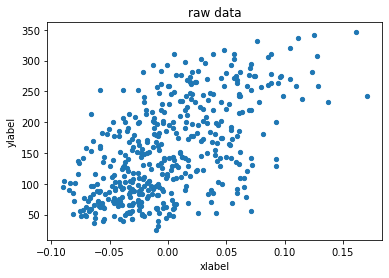

In [31]:
def draw_plot(X,y):
    plt.scatter(X,y,s = 18)
    plt.xlabel("xlabel")
    plt.ylabel("ylabel")
    plt.title("raw data")
draw_plot(X,y)

In [45]:
# initialize theta
# Trun to (len,1)
X = X.reshape(len(X),1) 
y = y.reshape(len(y),1)
theta = np.zeros([X.shape[1]+1,1])

In [46]:
def get_cost_func(X,y,theta):
    X = np.insert(X,0,np.array([1]*X.shape[0]),axis = 1)
    linear_func = X.dot(theta)
    cost_func = np.sum((y - linear_func)**2) / X.shape[0]
    return cost_func

In [52]:
learning_rate = 0.2
epoch = 5000

def linear_gradient(X,y,theta,learning_rate):
    X = np.insert(X,0,np.array([1]*X.shape[0]),axis = 1)
    linear_func = X.dot(theta)
    dtheta = X.T.dot((linear_func - y))*(2) / X.shape[0]
    theta = theta - learning_rate * dtheta
    return theta

def linear_iteration(X,y,theta,learning_rate,epoch):
    for i in range(epoch + 1):
        if i % 100 == 0:
            print("epoch {0}: loss = {1}".format(i,get_cost_func(X,y,theta)))
        theta = linear_gradient(X,y,theta,learning_rate)
    print("Final Result:")
    print("epoch {0}: loss = {1}".format("Final",get_cost_func(X,y,theta)))
    return theta

linear_iteration(X,y,theta,learning_rate,epoch)

epoch 0: loss = 29074.481900452487
epoch 100: loss = 5592.095929000281
epoch 200: loss = 5310.2546922269985
epoch 300: loss = 5075.094606220181
epoch 400: loss = 4878.883907303832
epoch 500: loss = 4715.171437968684
epoch 600: loss = 4578.574541041885
epoch 700: loss = 4464.602084784853
epoch 800: loss = 4369.506800210256
epoch 900: loss = 4290.162075657427
epoch 1000: loss = 4223.959157789022
epoch 1100: loss = 4168.721379108826
epoch 1200: loss = 4122.632591910841
epoch 1300: loss = 4084.1774556592686
epoch 1400: loss = 4052.0916145245383
epoch 1500: loss = 4025.3201269763417
epoch 1600: loss = 4002.9827806517196
epoch 1700: loss = 3984.3451520953017
epoch 1800: loss = 3968.7944598528597
epoch 1900: loss = 3955.819416998716
epoch 2000: loss = 3944.9934206737826
epoch 2100: loss = 3935.960525927692
epoch 2200: loss = 3928.4237427028525
epoch 2300: loss = 3922.135271180162
epoch 2400: loss = 3916.8883544370437
epoch 2500: loss = 3912.510480543541
epoch 2600: loss = 3908.85771059011
epo

array([[152.13348416],
       [939.17758356]])

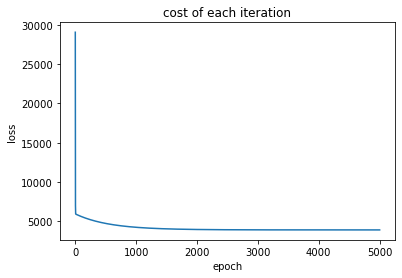

In [54]:
def draw_loss_func(X,y,theta,learning_rate,epoch):
    iteration_loss_list = []
    
    for i in range(epoch + 1):
        loss = get_cost_func(X,y,theta)
        iteration_loss_list.append([i,loss])
        theta = linear_gradient(X,y,theta,learning_rate)
        
    plt.plot([x[0] for x in iteration_loss_list],[y[1] for y in iteration_loss_list])
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("cost of each iteration")
draw_loss_func(X,y,theta,learning_rate,epoch)

epoch 0: loss = 29074.481900452487
epoch 100: loss = 5592.095929000281
epoch 200: loss = 5310.2546922269985
epoch 300: loss = 5075.094606220181
epoch 400: loss = 4878.883907303832
epoch 500: loss = 4715.171437968684
epoch 600: loss = 4578.574541041885
epoch 700: loss = 4464.602084784853
epoch 800: loss = 4369.506800210256
epoch 900: loss = 4290.162075657427
epoch 1000: loss = 4223.959157789022
epoch 1100: loss = 4168.721379108826
epoch 1200: loss = 4122.632591910841
epoch 1300: loss = 4084.1774556592686
epoch 1400: loss = 4052.0916145245383
epoch 1500: loss = 4025.3201269763417
epoch 1600: loss = 4002.9827806517196
epoch 1700: loss = 3984.3451520953017
epoch 1800: loss = 3968.7944598528597
epoch 1900: loss = 3955.819416998716
epoch 2000: loss = 3944.9934206737826
epoch 2100: loss = 3935.960525927692
epoch 2200: loss = 3928.4237427028525
epoch 2300: loss = 3922.135271180162
epoch 2400: loss = 3916.8883544370437
epoch 2500: loss = 3912.510480543541
epoch 2600: loss = 3908.85771059011
epo

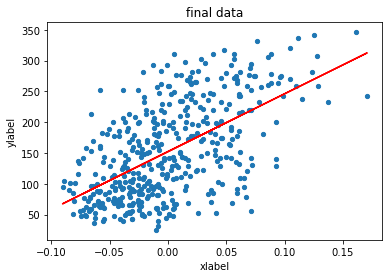

In [55]:
def plot_data(X,y,theta):
    plt.scatter(X,y,s = 18)
    X_ = np.insert(X,0,np.array([1]*X.shape[0]),axis = 1)
    y_pre = X_.dot(theta)
    plt.plot(X,y_pre,"r")
    plt.xlabel("xlabel")
    plt.ylabel("ylabel")
    plt.title("final data")
plot_data(X,y,linear_iteration(X,y,theta,learning_rate,epoch))